### **Migration Pattern of the Ruby-throated Hummingbird**

In [2]:
# import dependencies
import os
import requests
import json
import pandas as pd
import plotly.express as px
from config import api_key
from config import mapbox_token
from config import g_key
from calendar import monthrange

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

**Ruby-throated hummingbirds are the only hummingbirds that breed on the eastern coast of North America. They weigh less than a slice of bread and will migrate across the Gulf of Mexico in less than a day. Hummingbirds in general are able to fly backwards and even upside down! Ruby-throated hummingbirds build tiny nests for their even tinier eggs. They may produce up to three broods in a single year!** 

![alt text](60395561-480px.jpg)

- Name: ruby throated hummingbird (Archilochus colubris)
- Range: Northern and Central America
- Habitat: mostly forests and forest edges that provide enough food
- Size: 0.1oz (2.8g) in weight; 4in (10cm) wingspan
- Diet: nectar from tubular flowers as well as arthropods like mosquitoes and spiders
- Predators: larger birds such as kite and kestrels, domestic cats, lizards, snakes, and nest invaders like blue jays, squirrels, and chipmunks
- Life Cycle: females live longer - up to nine years

In [2]:
# create function to hold columns for df
def bird_data(data):
    return {
        "Common Name": data["comName"],
        "Scientific Name": data["sciName"],
        "Location Name": data["locName"],
        "Latitude": data["lat"],
        "Longitude": data["lng"],
        "Date": data["obsDt"],
        "Observation Validity": data["obsValid"],
    }

In [3]:
month_results = []
day_results = []
month = []
day = []
all_data = []

record = 1


for month in range(1, 13):
    for day in range(1, monthrange(2019, month)[1] + 1):
        url = f"https://api.ebird.org/v2/data/obs/US-TX/historic/2019/{month}/{day}"
        response = requests.get(url, params={"key": api_key})
        data = response.json()

        for bird in data:

            results = bird_data(bird)
            results["month"] = month
            results["day"] = day
            all_data.append(results)

df = pd.DataFrame(all_data)
df

,Common Name,Scientific Name,Location Name,Latitude,Longitude,Date,Observation Validity,month,day
0,Great Horned Owl,Bubo virginianus,503 Shadberry Dr,30.229906,-95.550102,2019-01-01 22:15,True,1,1
1,Blue-winged Teal,Spatula discors,"1040 West Farm Road 71, Talco, Texas, US (33.3...",33.341312,-95.267409,2019-01-01 21:47,True,1,1
2,Gadwall,Mareca strepera,"1040 West Farm Road 71, Talco, Texas, US (33.3...",33.341312,-95.267409,2019-01-01 21:47,True,1,1
3,Eurasian Collared-Dove,Streptopelia decaocto,"1040 West Farm Road 71, Talco, Texas, US (33.3...",33.341312,-95.267409,2019-01-01 21:47,True,1,1
4,Mourning Dove,Zenaida macroura,"1040 West Farm Road 71, Talco, Texas, US (33.3...",33.341312,-95.267409,2019-01-01 21:47,True,1,1
...,...,...,...,...,...,...,...,...,...
129925,Common Tern,Sterna hirundo,Bolivar Flats Shorebird Sanctuary (UTC 058),29.371137,-94.728708,2019-12-31 07:28,True,12,31
129926,Black-crowned/Yellow-crowned Night-Heron,Nycticorax nycticorax/Nyctanassa violacea,Los Fresnos,26.071750,-97.476360,2019-12-31 07:08,True,12,31
129927,Buteo sp.,Buteo sp.,Los Fresnos,26.071750,-97.476360,2019-12-31 07:08,True,12,31
129928,warbler sp. (Parulidae sp.),Parulidae sp.,Los Fresnos,26.071750,-97.476360,2019-12-31 07:08,True,12,31


In [ ]:
pd.to_csv("Birds in Texas 2019.csv")

In [7]:
data_birds = pd.DataFrame(pd.read_csv("Birds in Texas 2019.csv"))
data_birds.loc[data_birds["Common Name"] == "Ruby-throated Hummingbird"]

,Unnamed: 0,Common Name,Scientific Name,Location Name,Latitude,Longitude,Date,Observation Validity,month,day
305,305,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-01 14:00,True,1,1
706,706,Ruby-throated Hummingbird,Archilochus colubris,Orwig Home,29.766149,-95.568746,2019-01-02 09:00,True,1,2
967,967,Ruby-throated Hummingbird,Archilochus colubris,Boggy Bayou Nature Park,28.456368,-96.411582,2019-01-03 15:51,True,1,3
1328,1328,Ruby-throated Hummingbird,Archilochus colubris,Bentsen-Rio Grande Val. SP--HQ Buildings area,26.185605,-98.379940,2019-01-04 15:42,True,1,4
1780,1780,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-05 11:19,True,1,5
...,...,...,...,...,...,...,...,...,...,...
128246,128246,Ruby-throated Hummingbird,Archilochus colubris,US-TX-Pasadena-4515 Olive Green Ct,29.612330,-95.112571,2019-12-27 16:40,True,12,27
128712,128712,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-12-28 14:43,True,12,28
128847,128847,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-29 19:07,True,12,29
129211,129211,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-30 18:04,True,12,30


In [8]:
# pulling the hummingbird from df
humming_bird = data_birds.loc[data_birds["Scientific Name"] == "Archilochus colubris"]
humming_bird

,Unnamed: 0,Common Name,Scientific Name,Location Name,Latitude,Longitude,Date,Observation Validity,month,day
305,305,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-01 14:00,True,1,1
706,706,Ruby-throated Hummingbird,Archilochus colubris,Orwig Home,29.766149,-95.568746,2019-01-02 09:00,True,1,2
967,967,Ruby-throated Hummingbird,Archilochus colubris,Boggy Bayou Nature Park,28.456368,-96.411582,2019-01-03 15:51,True,1,3
1328,1328,Ruby-throated Hummingbird,Archilochus colubris,Bentsen-Rio Grande Val. SP--HQ Buildings area,26.185605,-98.379940,2019-01-04 15:42,True,1,4
1780,1780,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-05 11:19,True,1,5
...,...,...,...,...,...,...,...,...,...,...
128246,128246,Ruby-throated Hummingbird,Archilochus colubris,US-TX-Pasadena-4515 Olive Green Ct,29.612330,-95.112571,2019-12-27 16:40,True,12,27
128712,128712,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-12-28 14:43,True,12,28
128847,128847,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-29 19:07,True,12,29
129211,129211,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-30 18:04,True,12,30


In [9]:
# reset the index
humming_bird_df = (
    pd.DataFrame(humming_bird).reset_index(drop=True).drop(columns="Unnamed: 0")
)

In [7]:
humming_bird_df.to_csv("Hummingbird in Texas 2019.csv")

In [10]:
# Spring (March through May) 3-5
# Summer (June through August) 6-8
# Fall (September through December) 9-12
# Winter (January through February) 1-2

humming_bird_df["Season"] = pd.cut(
    humming_bird_df["month"],
    bins=[0, 3, 6, 9, 13],
    labels=["Winter", "Spring", "Summer", "Fall"],
    right=False,
)

,Common Name,Scientific Name,Location Name,Latitude,Longitude,Date,Observation Validity,month,day,Season
0,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-01 14:00,True,1,1,Winter
1,Ruby-throated Hummingbird,Archilochus colubris,Orwig Home,29.766149,-95.568746,2019-01-02 09:00,True,1,2,Winter
2,Ruby-throated Hummingbird,Archilochus colubris,Boggy Bayou Nature Park,28.456368,-96.411582,2019-01-03 15:51,True,1,3,Winter
3,Ruby-throated Hummingbird,Archilochus colubris,Bentsen-Rio Grande Val. SP--HQ Buildings area,26.185605,-98.379940,2019-01-04 15:42,True,1,4,Winter
4,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-05 11:19,True,1,5,Winter
...,...,...,...,...,...,...,...,...,...,...
359,Ruby-throated Hummingbird,Archilochus colubris,US-TX-Pasadena-4515 Olive Green Ct,29.612330,-95.112571,2019-12-27 16:40,True,12,27,Fall
360,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-12-28 14:43,True,12,28,Fall
361,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-29 19:07,True,12,29,Fall
362,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-30 18:04,True,12,30,Fall


In [11]:
humming_bird_df["month"] = humming_bird_df["month"].replace({1: "January"})
humming_bird_df["month"] = humming_bird_df["month"].replace({2: "February"})
humming_bird_df["month"] = humming_bird_df["month"].replace({3: "March"})
humming_bird_df["month"] = humming_bird_df["month"].replace({4: "April"})
humming_bird_df["month"] = humming_bird_df["month"].replace({5: "May"})
humming_bird_df["month"] = humming_bird_df["month"].replace({6: "June"})
humming_bird_df["month"] = humming_bird_df["month"].replace({7: "July"})
humming_bird_df["month"] = humming_bird_df["month"].replace({8: "August"})
humming_bird_df["month"] = humming_bird_df["month"].replace({9: "September"})
humming_bird_df["month"] = humming_bird_df["month"].replace({10: "October"})
humming_bird_df["month"] = humming_bird_df["month"].replace({11: "November"})
humming_bird_df["month"] = humming_bird_df["month"].replace({12: "December"})


humming_bird_df

,Common Name,Scientific Name,Location Name,Latitude,Longitude,Date,Observation Validity,month,day,Season
0,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-01 14:00,True,January,1,Winter
1,Ruby-throated Hummingbird,Archilochus colubris,Orwig Home,29.766149,-95.568746,2019-01-02 09:00,True,January,2,Winter
2,Ruby-throated Hummingbird,Archilochus colubris,Boggy Bayou Nature Park,28.456368,-96.411582,2019-01-03 15:51,True,January,3,Winter
3,Ruby-throated Hummingbird,Archilochus colubris,Bentsen-Rio Grande Val. SP--HQ Buildings area,26.185605,-98.379940,2019-01-04 15:42,True,January,4,Winter
4,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-01-05 11:19,True,January,5,Winter
...,...,...,...,...,...,...,...,...,...,...
359,Ruby-throated Hummingbird,Archilochus colubris,US-TX-Pasadena-4515 Olive Green Ct,29.612330,-95.112571,2019-12-27 16:40,True,December,27,Fall
360,Ruby-throated Hummingbird,Archilochus colubris,Estero Llano Grande SP WBC (LTC 054),26.125870,-97.957272,2019-12-28 14:43,True,December,28,Fall
361,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-29 19:07,True,December,29,Fall
362,Ruby-throated Hummingbird,Archilochus colubris,"100–198 Daisy St, Weslaco US-TX (26.1498,-97.9...",26.149772,-97.959743,2019-12-30 18:04,True,December,30,Fall


In [11]:
humming_bird_df.to_csv("Hummingbird in Texas 2019 by Month.csv")

## During the cold winter months, Ruby-throated Hummingbirds spend their time in Central America and southern Mexico. Then, as the weather begins to turn warm, they will start to make their northern trip up to the United States. This can be a grueling journey, as many of them choose to fly over the Gulf of Mexico. This flight alone can take 18-22 hours of non-stop flight before reaching land on the other side of the gulf! They have the capability to fly over 2000 kilometers (1243 miles) non-stop.

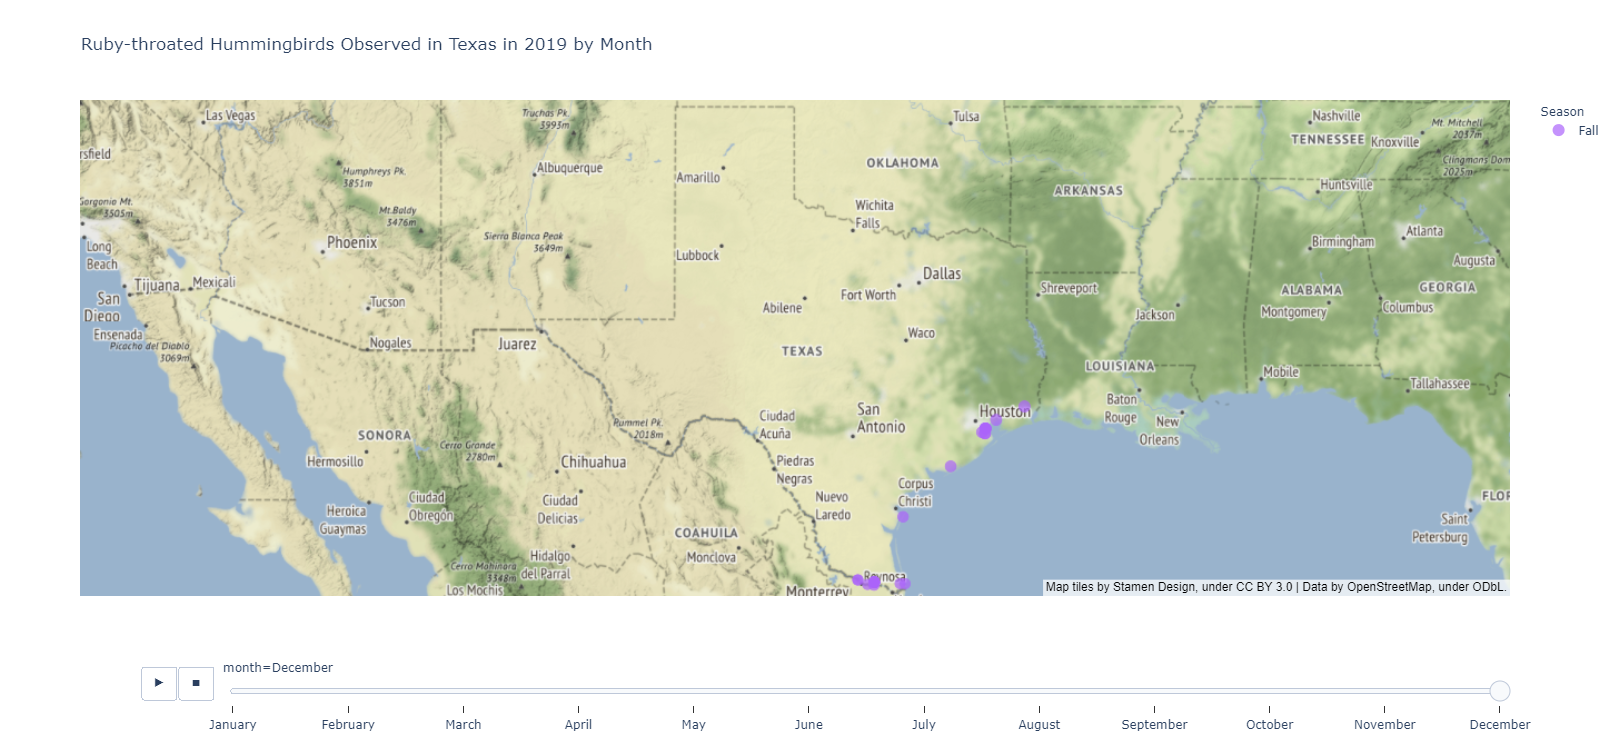

In [22]:
px.set_mapbox_access_token(mapbox_token)

fig = px.scatter_mapbox(
    humming_bird_df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Location Name",
    color="Season",
    size="Latitude",
    animation_frame="month",
    color_continuous_scale=px.colors.cyclical.Edge,
    size_max=10,
    height=750,
    mapbox_style="stamen-terrain",
    zoom=4.5,
    title=f"Ruby-throated Hummingbirds Observed in Texas in 2019 by Month",
)

fig.show()